# Projet 2 : Participez à un concours sur la Smart City

## Contexte

L’ONG “Data is for Good” propose des challenges de Data Science en ligne sur des thématiques ayant trait au bien commun.

Nous avons décidé de participer à un challenge proposé par la ville de Paris, dans le cadre de leur programme "Végétalisons la ville".

Dans ce challenge, ouvert à tous, nous réaliserons une analyse exploratoire avec un jeu de données portant sur les arbres de la ville de Paris.

L'objectif de la ville de Paris est de pouvoir optimiser les tournées pour l’entretien des arbres de la ville. 

## Librairies utilisées avec le langage Python:

In [26]:
# Importation des librairies
from scipy.stats import skew , kurtosis  
import numpy as np
import pandas as pd
import pyarrow as pya
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import FastMarkerCluster

## Visualisation du tableau de données brutes

In [2]:
# Chargement des données brutes du fichier CSV avec des virgules pour séparateur
data=pd.read_csv('p2-arbres-fr.csv', sep= ';' )
# Visualisation des 5 premières lignes
data.head(5)

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
0,99874,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,19,Marronnier,Aesculus,hippocastanum,NaN,20,5,NaN,0.0,48.857620,2.320962
1,99875,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,20,If,Taxus,baccata,NaN,65,8,A,NaN,48.857656,2.321031
2,99876,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,21,If,Taxus,baccata,NaN,90,10,A,NaN,48.857705,2.321061
3,99877,Arbre,Jardin,PARIS 7E ARRDT,NaN,NaN,MAIRIE DU 7E 116 RUE DE GRENELLE PARIS 7E,22,Erable,Acer,negundo,NaN,60,8,A,NaN,48.857722,2.321006
4,99878,Arbre,Jardin,PARIS 17E ARRDT,NaN,NaN,PARC CLICHY-BATIGNOLLES-MARTIN LUTHER KING,000G0037,Arbre à miel,Tetradium,daniellii,NaN,38,0,NaN,NaN,48.890435,2.315289


Le tableau de données est formé ainsi :
- **id :** numéro d'identification de l'arbre 
- **type_emplacement :** type de l'emplacement dans lequel l'arbre est situé
- **domanialite :** type de lieu dans lequel l'arbre est situé
- **arrondissement :** arrondissement de Paris dans lequel l'arbre est situé 
- **complement_addresse :** complément d'adresse de la localisation de l'arbre
- **numero :** numéro de l'adresse de la localisation de l'arbre
- **lieu :** adresse de la localisation de l'arbre
- **id_emplacement :** numéro d'identification de l'emplacement de l'arbre
- **libelle_francais :** nom commun de l'espèce de l'arbre
- **genre :** genre de l'arbre 
- **espece :** espèce de l'arbre 
- **variete :** variété de l'arbre 
- **circonference_cm :** circonférence en centimètres de l'arbre 
- **hauteur_m :** taille en mètres de l'arbre 
- **stade_developpement :** stade de développement de l'arbre 
- **remarquable :** si l'arbre est classifié comme "remarquable" ou non
- **geo_point_2d_a :** latitude de la position de l'arbre 
- **geo_point_2d_b :** longitude de la position de l'arbre

## Etude des données : nombre de lignes & colonnes, types des données et statistiques

In [3]:
data.shape

(200137, 18)

Nous avons donc 200137 arbres dans notre tableau.

In [4]:
data.dtypes

id                       int64
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                 float64
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable            float64
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Nous apercevons que la colonne "remarquable" n'a pas été catégorisé avec le bon type.
Nous décidons de caster en objet les 3 colonnes sur lequel il n'est pas pertinent de faire des calculs : "id", "numero" et "remarquable".

In [5]:
c=['id','numero','remarquable']
for i in c :
    data.loc[:,i]=data[i].astype(object)
data.dtypes

C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_21768\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[99874 99875 99876 ... 2024743 2024744 2024745]' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  data.loc[:,i]=data[i].astype(object)
C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_21768\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[nan nan nan ... nan nan nan]' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.loc[:,i]=data[i].astype(object)
C:\Users\celine.lesur\AppData\Local\Temp\ipykernel_21768\849979076.py:3: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '[0.0 nan nan ... 0.0 0.0 0.0]' has dtype incompatible with float64, please explicitly cast to

id                      object
type_emplacement        object
domanialite             object
arrondissement          object
complement_addresse     object
numero                  object
lieu                    object
id_emplacement          object
libelle_francais        object
genre                   object
espece                  object
variete                 object
circonference_cm         int64
hauteur_m                int64
stade_developpement     object
remarquable             object
geo_point_2d_a         float64
geo_point_2d_b         float64
dtype: object

Maintenant que nos colonnes sont bien catégorisés, nous recherchons d'éventuels duplicatas en fonction les identifiants des arbres.

In [6]:
data.duplicated('id').sum()


0

Les 200137 arbres sont donc bien uniques dans notre tableau.

Recherchons d'éventuels valeurs incohérentes dans les variables quantitatives entières et flottantes.

In [7]:
data.describe()

,circonference_cm,hauteur_m,geo_point_2d_a,geo_point_2d_b
count,200137.000000,200137.000000,200137.000000,200137.000000
mean,83.380479,13.110509,48.854491,2.348208
std,673.190213,1971.217387,0.030234,0.051220
min,0.000000,0.000000,48.742290,2.210241
25%,30.000000,5.000000,48.835021,2.307530
50%,70.000000,8.000000,48.854162,2.351095
75%,115.000000,12.000000,48.876447,2.386838
max,250255.000000,881818.000000,48.911485,2.469759


Nous trouvons des valeurs maximales et minimales aberrantes :
- circonférence ou hauteur minimales égales à 0
- circonférence maximale égale à 250255 cm
- hauteur maximale égale à 881818 m

Après des recherches, il semble que l'arbre le plus grand de France mesure 67,77 m de haut et que l'arbre avec la plus grande circonférence de France a une circonférence de 13,23 m.
Donc nous forçons toutes les valeurs aberrantes en NaN, c'est à dire :
- les valeurs de circonférence = 0 ou > 1400 cm 
- les valeurs de hauteur = 0 ou > 68 m

In [8]:
# Imputation des valeur aberrantes en Nan
data.loc[(data['circonference_cm']==0) |(data['circonference_cm']>1400), 'circonference_cm']= np.nan
data.loc[(data['hauteur_m']==0) |(data['hauteur_m']>68), 'hauteur_m']= np.nan
# Nouvelles statistiques des colonnes "circonference_cm" et "hauteur_m" sans les valeurs aberrantes
df=data.iloc[:,[12,13]]
df.describe()

,circonference_cm,hauteur_m
count,174235.000000,160569.000000
mean,91.718421,10.400140
std,61.197516,5.321226
min,1.000000,1.000000
25%,45.000000,6.000000
50%,80.000000,10.000000
75%,122.500000,14.000000
max,1360.000000,68.000000


In [9]:
# Calcul de l'étendue
etend_cir = data['circonference_cm'].max() - data['circonference_cm'].min()
etend_hau = data['hauteur_m'].max() - data['hauteur_m'].min()
print ("L'étendue de la circonférence est de " + str(etend_cir) + ' cm et celle de la hauteur est de ' + str(etend_hau) + ' m')

L'étendue de la circonférence est de 1359.0 cm et celle de la hauteur est de 67.0 m


In [36]:
# calcul du coefficient de symétrie skewness et du coefficient d’aplatissement kurtosis) en ne tenant pas compte des NaN
skew_cir=skew(data['circonference_cm'], bias=True, nan_policy='omit')
skew_hau=skew(data['hauteur_m'], bias=True, nan_policy='omit')
print ("Le skewness de la circonférence est de " + str(skew_cir) + ' et celle de la hauteur est de ' + str(skew_hau) )

kur_cir=kurtosis(data['circonference_cm'], bias=True, nan_policy='omit')
kur_hau=kurtosis(data['hauteur_m'], bias=True, nan_policy='omit')
print ("Le kurtosis de la circonférence est de " + str(kur_cir) + ' et celle de la hauteur est de ' + str(kur_hau) )

Le skewness de la circonférence est de 2.4466326518351433 et celle de la hauteur est de 1.3300644046776051
Le kurtosis de la circonférence est de 25.052239037000987 et celle de la hauteur est de 5.551990536286983


La circonférence et la hauteur ont un skewness positif, la distribution est donc décalée à gauche : la circonférence plus nettement que la hauteur.

La circonférence et la hauteur ont un kurtosis positif, la distribution est donc plus "pointue", plus concentrée qu'une distribution normale : la circonférence plus nettement que la hauteur.

Maintenant que les valeurs aberrantes ont été prises en charge, nous nous intéressons aux valeurs manquantes.

In [10]:
data.isna().mean()

id                     0.000000
type_emplacement       0.000000
domanialite            0.000005
arrondissement         0.000000
complement_addresse    0.845596
numero                 1.000000
lieu                   0.000000
id_emplacement         0.000000
libelle_francais       0.007480
genre                  0.000080
espece                 0.008754
variete                0.816241
circonference_cm       0.129421
hauteur_m              0.197705
stade_developpement    0.335795
remarquable            0.315274
geo_point_2d_a         0.000000
geo_point_2d_b         0.000000
dtype: float64

Nous voyons alors que : 
- la colonne "numero" n'est jamais renseignée
- les colonnes "complement_addresse" et "variete" sont très peu renseignées (>80% de valeurs manquantes)
Ces 3 colonnes ne semblent pas exploitables pour notre analyse.

Maintenant nous étudions également les variables catégorielles.

In [11]:
data.describe(include='all')

,id,type_emplacement,domanialite,arrondissement,complement_addresse,numero,lieu,id_emplacement,libelle_francais,genre,espece,variete,circonference_cm,hauteur_m,stade_developpement,remarquable,geo_point_2d_a,geo_point_2d_b
count,200137.0,200137,200136,200137,30902,0,200137,200137,198640,200121,198385,36777,174235.000000,160569.000000,132932,137039.0,200137.000000,200137.000000
unique,200137.0,1,9,25,3795,0,6921,69040,192,175,539,436,NaN,NaN,4,2.0,NaN,NaN
top,99874.0,Arbre,Alignement,PARIS 15E ARRDT,SN°,NaN,PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE,101001,Platane,Platanus,x hispanica,Baumannii',NaN,NaN,A,0.0,NaN,NaN
freq,1.0,200137,104949,17151,557,NaN,2995,1324,42508,42591,36409,4538,NaN,NaN,64438,136855.0,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,91.718421,10.400140,NaN,NaN,48.854491,2.348208
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,61.197516,5.321226,NaN,NaN,0.030234,0.051220
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000,1.000000,NaN,NaN,48.742290,2.210241
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45.000000,6.000000,NaN,NaN,48.835021,2.307530
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.000000,10.000000,NaN,NaN,48.854162,2.351095
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,122.500000,14.000000,NaN,NaN,48.876447,2.386838


Nous voyons que :
- la colonne "type_emplacement" a une unique valeur et n'a donc aucun intérêt pour l'analyse.
- les colonnes "domanialite", "arrondissement", "stade_developpement" et "remarquable" ont le moins de cas unique et pourront donc être intéressantes à utiliser pour les regroupements.

Nous supprimons donc les colonnes "type_emplacement" et "numero" qui n'ont aucun intérêt pour l'analyse.

In [12]:
clean_data = data.drop(columns=['type_emplacement','numero'])

Regardons les classements "Top 10" des colonnes arrondissement, lieu et espèce qui peuvent être les plus pertinentes à étudier pour optimiser les tournées.

arrondissement
PARIS 15E ARRDT      17151
PARIS 13E ARRDT      16712
PARIS 16E ARRDT      16403
PARIS 20E ARRDT      15340
PARIS 19E ARRDT      13709
PARIS 12E ARRDT      12600
SEINE-SAINT-DENIS    11570
BOIS DE VINCENNES    11510
PARIS 14E ARRDT      11399
PARIS 17E ARRDT      10762
Name: count, dtype: int64


<Axes: xlabel='arrondissement'>

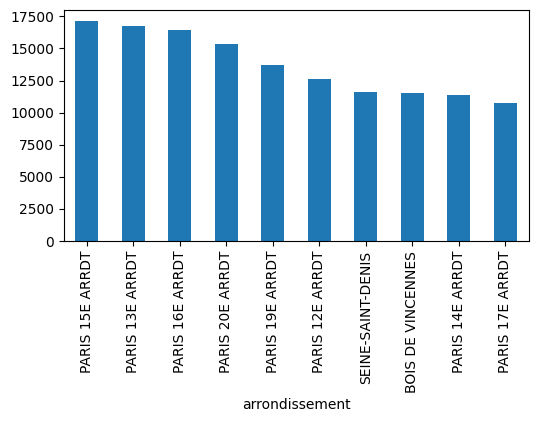

In [13]:
# Top 10 des valeurs uniques pour l'arrondissement, le lieu et l'espèce de l'arbre et diagramme correspondant
un_arr=clean_data.arrondissement.value_counts()
un_lieu=clean_data.lieu.value_counts()
un_esp=clean_data.espece.value_counts()
#  Affichage du résultat avec un diagramme à barre
print(un_arr[:10])
plt.figure(1, figsize=(6, 3))
un_arr[:10].plot(kind='bar')

lieu
PARC FLORAL DE PARIS / ROUTE DE LA PYRAMIDE                                  2995
PARC DES BUTTES CHAUMONT                                                     2331
PARC ANDRE CITROEN                                                           2095
PARC OMNISPORT SUZANNE LENGLEN / 7 BOULEVARD DES FRERES VOISIN               1478
INSEP / AVENUE DU TREMBLAY                                                   1293
JARDIN DU CHAMP DE MARS                                                      1276
ARBORETUM DE L ECOLE DU BREUIL - ROUTE DE LA FERME / ROUTE DE LA PYRAMIDE    1261
AVENUE DES CHAMPS ELYSEES                                                    1246
PARC DE BERCY                                                                1223
PARC MONTSOURIS                                                              1167
Name: count, dtype: int64


<Axes: ylabel='lieu'>

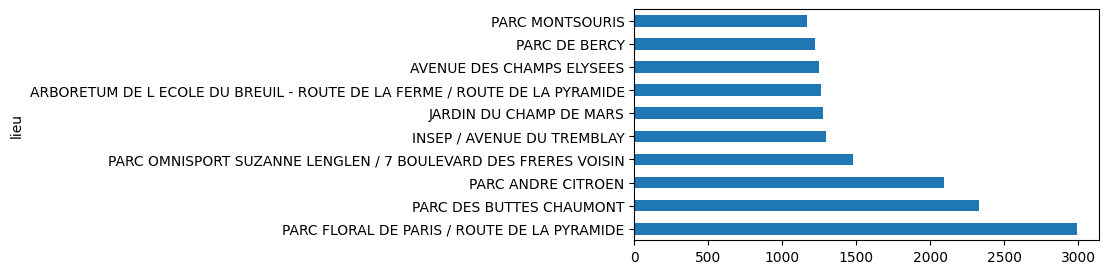

In [14]:
print(un_lieu[:10])
plt.figure(1, figsize=(6, 3))
un_lieu[:10].plot(kind='barh')

espece
x hispanica       36409
hippocastanum     20039
japonica          11822
n. sp.             9063
tomentosa          8962
pseudoplatanus     7431
platanoides        6286
nigra              4947
x europaea         4707
x carnea           4417
Name: count, dtype: int64


<Axes: xlabel='espece'>

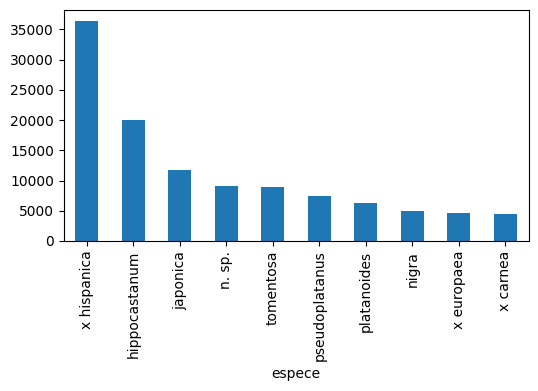

In [15]:
print(un_esp[:10])
plt.figure(1, figsize=(6, 3))
un_esp[:10].plot(kind='bar')

Traçons les histogrammes et boites à moustaches pour les variables numériques : circonférence, hauteur et les deux points de géolocalisation.

D:\tutorial-env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
D:\tutorial-env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
D:\tutorial-env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)
D:\tutorial-env\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


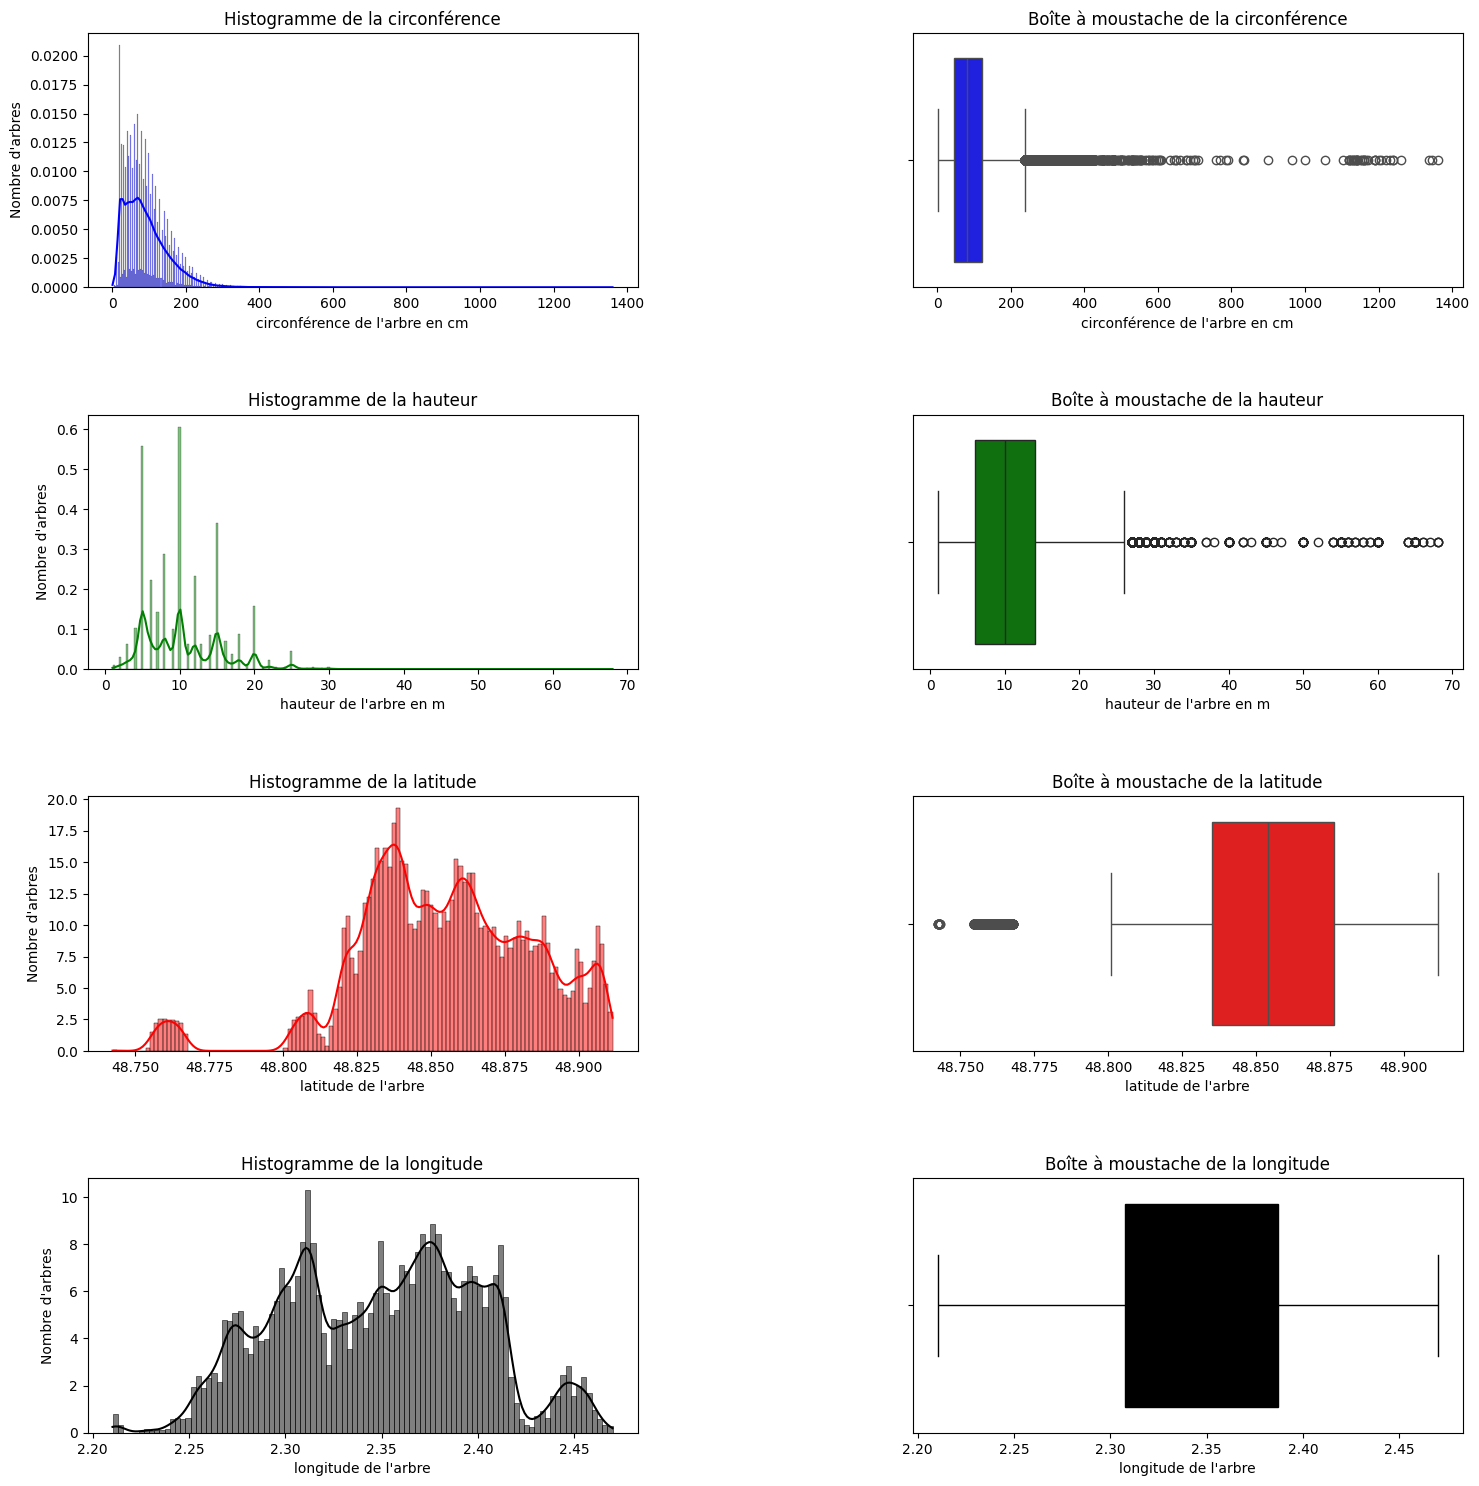

In [16]:
# Liste des variables à visualiser et leurs informations associées
variables=[('circonference_cm','circonférence','cm','blue',1),('hauteur_m','hauteur','m','green',3),('geo_point_2d_a','latitude', None,'red',5),('geo_point_2d_b','longitude',None,'black',7)]

# Boucle pour générer les sous-graphiques pour chaque variable
for i, (variable, titre, unite,color,place) in enumerate(variables, start=1):
    # Création de la figure et réglages des paramètres
    figure=plt.figure(1, figsize=(10, 20))
    plt.gcf().subplots_adjust(left=0.125, bottom=0.2, right=1.5, top=0.9, wspace=0.5, hspace=0.5)
    
    # # Création des histogrammes
    plt.subplot(4, 2, place)
    sns.histplot(data=clean_data, x=variable, color=color,kde=True,stat="density")
    plt.title(f'Histogramme de la {titre}')
    if unite is None :
        plt.xlabel(f"{titre} de l'arbre")
    else :
        plt.xlabel(f"{titre} de l'arbre en {unite}")
    plt.ylabel("Nombre d'arbres")

    place=place+1
    # Création des boîtes à moustaches
    axes = figure.add_subplot(4, 2, place)
    sns.boxplot(data=clean_data,x=variable, color=color, ax=axes)
    plt.title(f'Boîte à moustache de la {titre}')
    if unite is None :
        plt.xlabel(f"{titre} de l'arbre")
    else :
        plt.xlabel(f"{titre} de l'arbre en {unite}")

Pour la circonférence et la hauteur, nous observons l'apparition de valeurs atypiques.  
Un affichage différent de ces valeurs atypiques pourraient être cohérentes pour la suite de l'analyse, via la méthode de la distance interquartile.

Pour la latitude et la longitude, aucune valeur atypique n'apparait. Celles visible sur la boite à moustache de la latitude s'expliquent par la séparation en deux pics distincts de la distribution de la latitude visible sur l'histogramme.

In [17]:
# Méthode de la distance interquartile
q1_c=clean_data["circonference_cm"].quantile(q=0.25)
q3_c=clean_data["circonference_cm"].quantile(q=0.75)
q1_h=clean_data["hauteur_m"].quantile(q=0.25)
q3_h=clean_data["hauteur_m"].quantile(q=0.75)

IQR_c=q3_c-q1_c
IQR_h=q3_h-q1_h

borne_inf_c = q1_c-1.5*IQR_c
borne_sup_c = q3_c +1.5*IQR_c
borne_inf_h = q1_h-1.5*IQR_h
borne_sup_h = q3_h +1.5*IQR_h

print('La borne inférieure de la circonférence est: ',borne_inf_c)
print('La borne supérieure de la circonférence est: ',borne_sup_c )
print('La borne inférieure de la hauteur est: ',borne_inf_h)
print('La borne supérieure de la hauteur est: ',borne_sup_h )

# On crée une nouvelle colonne pour identifier les valeurs considérées comme atypique via la méthode de la distance interquartile
data_vat= clean_data.loc[(clean_data["circonference_cm"]>borne_sup_c)|(clean_data["hauteur_m"]>borne_sup_h) ]
clean_data["valeur_atypique"] = clean_data['id'].eq(data_vat['id'])

La borne inférieure de la circonférence est:  -71.25
La borne supérieure de la circonférence est:  238.75
La borne inférieure de la hauteur est:  -6.0
La borne supérieure de la hauteur est:  26.0


Mettons maintenant en relation la hauteur et la circonférence pour voir si un lien existe entre ces deux variables.

Affichons ce résultat en fonction du stade de développement et des valeurs normales/atypiques (croix pour les valeurs atypiques, ronds pour les valeurs normales).

Text(0, 0.5, "Hauteur de l'arbre")

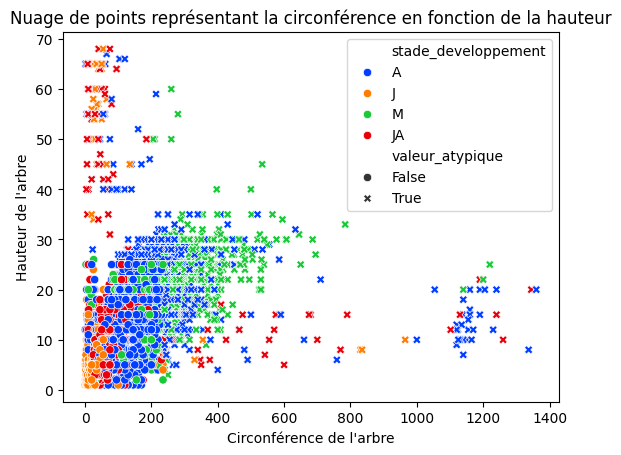

In [18]:
# Affichage de la relation circonférence/hauteur via un nuage de points avec distinction entre valeurs normales et atypiques.
sns.scatterplot(data=clean_data,x='circonference_cm', y='hauteur_m',hue ='stade_developpement',style='valeur_atypique',palette='bright',markers = {True: 'X', False: 'o'})
plt.title('Nuage de points représentant la circonférence en fonction de la hauteur')
plt.xlabel("Circonférence de l'arbre") 
plt.ylabel("Hauteur de l'arbre")

Une corrélation linéaire semble exister mais nous retrouvons des exceptions. 

Les valeurs atypiques sont nombreuses et beaucoup d'entre elles sont proches de la droite de corrélations, il ne serait donc pas pertinent de les exclure de l'analyse.

Les arbres jeunes et jeunes adultes ont plus fréquemment une circonférence faible mais peuvent avoir une hauteur importante. 
Nous pourrions essayer de voir si cela correspond à des types d'arbres particuliers mais il existe trop de genre différents dans cette base.

Calculons le coefficient de corrélation de Pearson entre la circonférence et la hauteur.

In [19]:
c=clean_data[['circonference_cm', 'hauteur_m']].corr()
print(c)

                  circonference_cm  hauteur_m
circonference_cm          1.000000   0.742243
hauteur_m                 0.742243   1.000000


La corrélation linéaire positive semble exister entre la circonférence et la hauteur de l'arbre

Regardonc maintenant la proportion d'arbres selon leur stade de développement.

Text(0.5, 1.0, "Proportion d'arbres selon leur stade de développement")

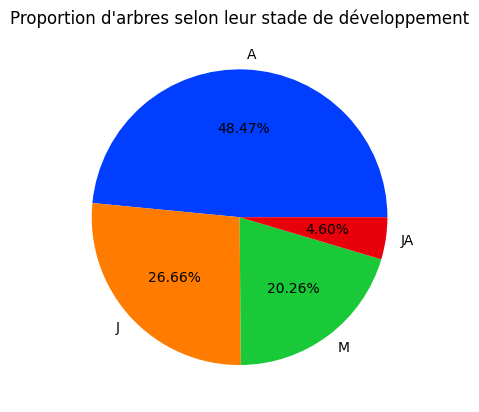

In [20]:
colors = sns.color_palette('bright')[0:5]
# Affichage d'un diagramme circulaire pour visualiser la proportion d'arbres selon leur stade de développement
plt.pie(x=clean_data['stade_developpement'].value_counts(normalize=True), labels=['A','J','M','JA'], colors=colors,autopct='%.2f%%')
plt.title("Proportion d'arbres selon leur stade de développement")

## Solutions pour la ville de Paris
### 1/ Améliorer la qualité de la base de données

Plus les données sont fiables, plus leur analyse peut déboucher sur des solutions fiables.

Il serait donc intéressant d'améliorer cette base de données :
- en renseignant les valeurs manquantes catégorielles "domanialite", "complement_addresse", "numero", "libelle_francais", "genre", "espece", "variete", "stade_developpement" et "remarquable"
- en mesurant les arbres qui n'ont pas de valeurs de circonférence ou de hauteur ou qui ont des valeurs aberrantes.

Identifions les arbres qui sont à mesurer afin de les traiter en priorité.

In [21]:
##### Créer une carte centrée sur la position GPS correspondant à la moyenne des latitudes et longitudes de nos arbres
carte_points_0 = folium.Map(location=[48.856026, 2.345935], zoom_start=13)


# On filtre les arbres à mesurer, c'est à dire ceux qui ont des valeurs manquantes pour la circonférence ou la hauteur.
t_loc_0=clean_data.loc[(clean_data['circonference_cm'].isnull())|(clean_data['hauteur_m'].isnull())]

# Ajout des marqueurs de la localisation des arbres Adultes et Matures
carte_points_0.add_child(FastMarkerCluster(t_loc_0[['geo_point_2d_a', 'geo_point_2d_b']].values.tolist()))

# # Sauvegarde et affichage de la carte
carte_points_0.save("carte_points_0.html")
carte_points_0

In [22]:
#Nombre d'arbres à mesurer
t_loc_0.shape

(39968, 17)

Voici la localisation des 39968 arbres à mesurer afin d'améliorer la base des données.

Les zones à plus forte concentration d'arbres à mesurer devrait faire l'objet de tournées spécifiques.

### 2/ Localiser les arbres Adultes et Matures qui demandent beaucoup d'entretien

Un arbre plus grand et plus vieux va demander plus d'entretien. Les tournées devront en priorité cibler ces arbres.
Interessons-nous donc à la localisation des arbres Adulte et Matures.

In [23]:
##### Créer une carte centrée sur la position GPS correspondant à la moyenne des latitudes et longitudes de nos arbres
carte_points_1 = folium.Map(location=[48.856026, 2.345935], zoom_start=13)


# On filtre les arbres Adultes et Matures
t_loc_1=clean_data.loc[(clean_data['stade_developpement']=='M')|(clean_data['stade_developpement']=='A')]

# Ajout des marqueurs de la localisation des arbres Adultes et Matures
carte_points_1.add_child(FastMarkerCluster(t_loc_1[['geo_point_2d_a', 'geo_point_2d_b']].values.tolist()))

# # Sauvegarde et affichage de la carte
carte_points_1.save("carte_points_1.html")
carte_points_1


In [24]:
#Nombre d'arbres adultes et matures
t_loc_1.shape

(70551, 17)

Voici la localisation des 70551 arbres adultes et matures de la ville de Paris.

Globalement, la majorité des arbres adultes et matures sont situés dans Paris intramuros.
Cependant,plusieurs groupes d'arbres adultes et matures se trouvent à l'extérieur de la ville de Paris. 

Dans le cadre, d'une optimisation des tournées, il faudra une tournée spécifique pour chacune de ces positions éloignées : le bois de Vincennes , le cimetière parisien de Thiais, le cimetière parisien d'Ivry, le cimetière parisien de Bagneux, le bois de Boulogne, le cimetière de la maison départementale de Nanterre, le cimetière parisien de Saint Ouen, le cimetière parisien de la chapelle et le cimetière parisien de Pantin.